In [32]:
import pandas as pd

df_mall = pd.read_csv('datasets/Mall_Customers.csv',index_col="CustomerID")
df_mall.head(3)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6


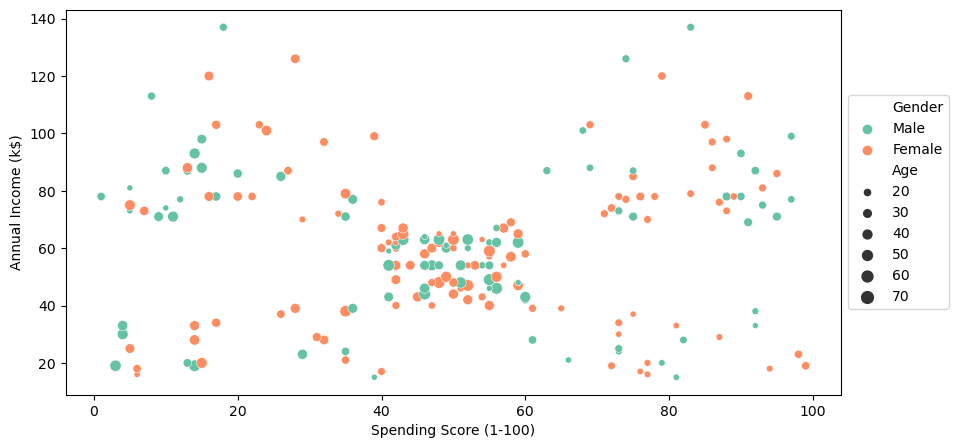

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(1 , figsize = (10 , 5) )
mall_plot = sns.scatterplot(
    data=df_mall,
    x="Spending Score (1-100)",
    y="Annual Income (k$)",
    hue="Gender",
    size="Age",
    palette="Set2"
);
mall_plot.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)


In [51]:
from sklearn import preprocessing

X = df_mall.drop(["Gender","Age"],axis=1)
X_norm = preprocessing.normalize(X)

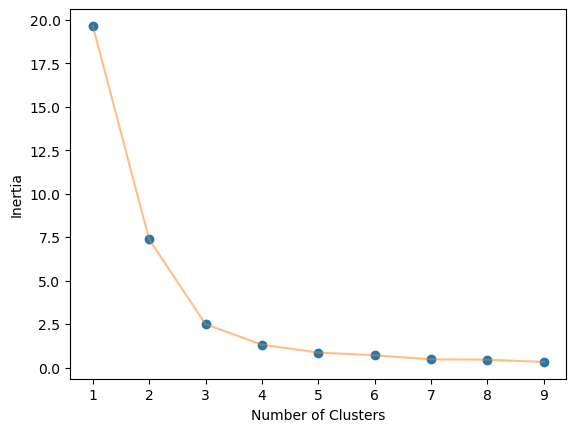

In [52]:
import numpy as np
from sklearn.cluster import KMeans


def elbow_plot(data,clusters):
    inertia = []
    for n in range(1, clusters):
        algorithm = KMeans(
            n_clusters=n,
            init="k-means++",
            random_state=125,
        )
        algorithm.fit(data)
        inertia.append(algorithm.inertia_)
    # Plot
    plt.plot(np.arange(1 , clusters) , inertia , 'o')
    plt.plot(np.arange(1 , clusters) , inertia , '-' , alpha = 0.5)
    plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
    plt.show();

elbow_plot(X_norm,10)

In [53]:
algorithm = KMeans(n_clusters=3, init="k-means++", random_state=125)
algorithm.fit(X_norm)
labels = algorithm.labels_

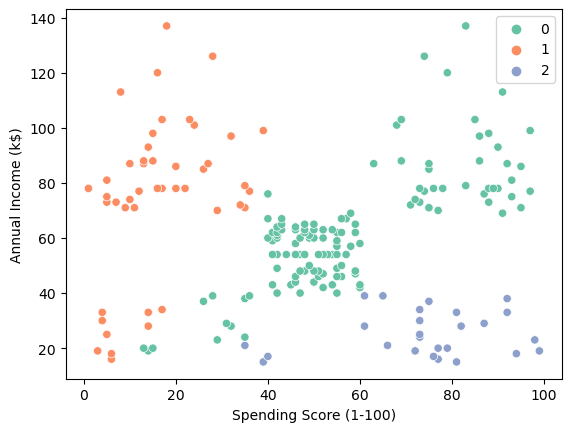

In [54]:
sns.scatterplot(data = X, x = 'Spending Score (1-100)', y = 'Annual Income (k$)', hue = labels, palette="Set2");

In [55]:
X = df_mall.drop(["Gender","Annual Income (k$)"],axis=1)

X_norm = preprocessing.normalize(X)

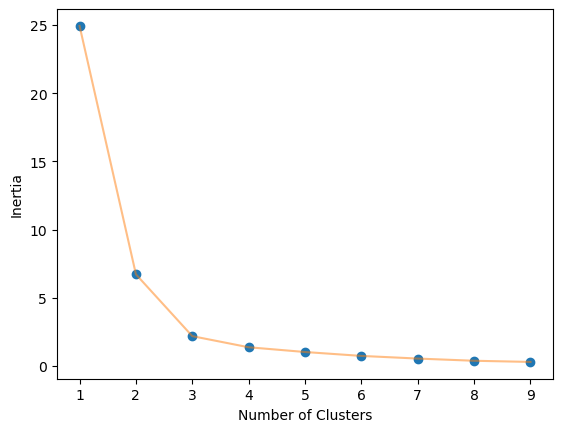

In [56]:
elbow_plot(X_norm,10)

In [57]:
algorithm = KMeans(n_clusters=3, init="k-means++", random_state=125)
algorithm.fit(X_norm)
labels = algorithm.labels_

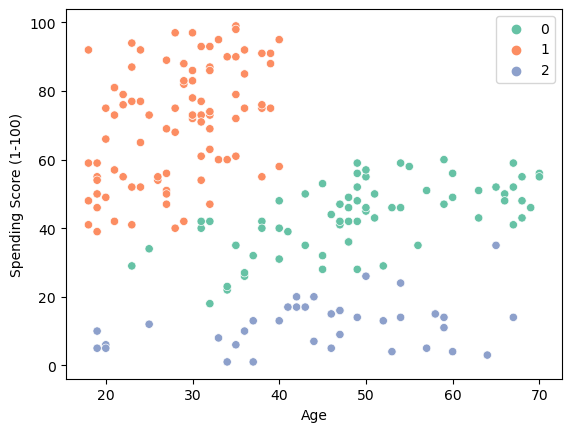

In [58]:
sns.scatterplot(data = X, x = 'Age', y = 'Spending Score (1-100)', hue = labels, palette="Set2");

**Market Segmentation**

- “0”: Medium spender from middle age to old ages.
- “1”: Young High spender. 
- “2”: Low spenders.  

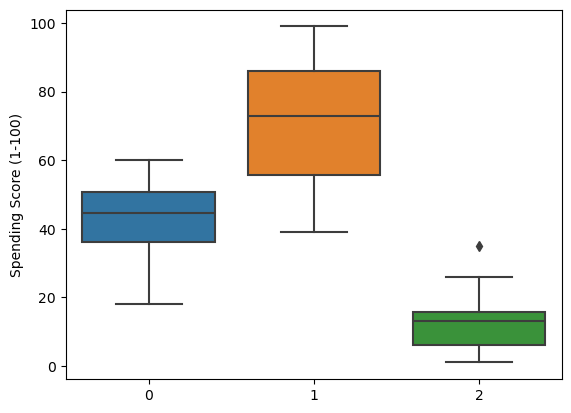

In [59]:
sns.boxplot(x = labels, y = X['Spending Score (1-100)']);

The Boxplot shows that the clustering was clearly based on spending score